<a href="https://colab.research.google.com/github/sr606/Python-Practice/blob/main/Business_Case_Netflix_Data_Exploration_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***1. Defining Problem Statement and Analysing basic metrics ***


Business Problem


Analyze the data and generate insights that could help Netflix in deciding which type of
shows/movies to produce and how they can grow the business in different countries

###Import Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

###Loading The Dataset

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Scaler/netflix .csv')



###let's check first 5 rows of data

In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [24]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


The dataset contains over 8807 entries and 12 columns. After a quick view of the data frames, it looks
like a typical movie/TVshows data frame without ratings. We can also see that there are NaN values
in some columns.

#**2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary**

###Getting all attributes/variables of df dataset

In [25]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

###shape of the data

In [26]:
df.ndim

2

In [27]:
df.shape

(8807, 12)

###Data Type of all the attributes

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


###Statistical Summary Before Data Cleaning:

In [29]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#*Missing Value & Outlier check (Treatment optional) *

In [30]:
df.isnull().any()

,0
show_id,False
type,False
title,False
director,True
cast,True
country,True
date_added,True
release_year,False
rating,True
duration,True


From the info, we know that there are 8807 entries and 12 columns to work with for this EDA. There
are a few columns that contain null values, “director,” “cast,” “country,” “date_added,” “rating.”


In [31]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


4307

There are a total of 4307 null values across the entire dataset with 2634 missing points under
"director", 825 under "cast", 831 under "country", 11 under "date_added", 4 under "rating" and
3 under “duration ”. We will have to handle all null data points before we can dive into EDA and
modelling.


#**Data Transformation**

In [32]:
# Converting the 'date_added' column to datetime format
# Specify the format and handle errors
df["date_added"] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')


In [33]:
# Extracting month, month name, and year from the 'date_added' column
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [34]:
# Splitting and expanding the 'cast' column
df_cast = df['cast'].str.split(',', expand=True).stack()
df_cast = df_cast.reset_index(level=1, drop=True).to_frame('cast')
df_cast['show_id'] = df['show_id']

# Splitting and expanding the 'country' column
df_country = df['country'].str.split(',', expand=True).stack()
df_country = df_country.reset_index(level=1, drop=True).to_frame('country')
df_country['show_id'] = df['show_id']

# Splitting and expanding the 'listed_in' column
df_listed_in = df['listed_in'].str.split(',', expand=True).stack()
df_listed_in = df_listed_in.reset_index(level=1, drop=True).to_frame('listed_in')
df_listed_in['show_id'] = df['show_id']

# Splitting and expanding the 'director' column
df_director = df['director'].str.split(',', expand=True).stack()
df_director = df_director.reset_index(level=1, drop=True).to_frame('director')
df_director['show_id'] = df['show_id']

In [50]:
df.shape

(8807, 16)

#**5. Missing Value & Outlier check (Treatment optional)**

###Filling Missing Values in 'country':

The missing values in the country column are filled with the mode (most frequent value) of that column.

In [35]:
# Filling missing values in the 'country' column with the mode value
df['country'] = df['country'].fillna(df['country'].mode()[0])

###Filling Missing Values in 'director':

For each unique combination of country and listed_in (genre), the mode of the director is computed. This ensures that missing directors are filled with the most frequent director for the same country and genre.


If any director values are still missing after this process, they are filled with the global mode of the director column.


In [36]:
# Step 2: Compute mode for 'director' grouped by 'country' and 'listed_in'
# Ensure a fallback for groups with no valid data
mode_director = df.groupby(['country', 'listed_in'])['director'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else None
)

# Step 3: Replace missing 'director' values based on the group mode
df['director'] = df.apply(
    lambda row: mode_director.get((row['country'], row['listed_in']), None)
    if pd.isnull(row['director']) else row['director'],
    axis=1
)

# Step 4: Fill remaining 'director' nulls with the global mode
df['director'] = df['director'].fillna(df['director'].mode()[0])


###Handling Missing Values in Other Object, Float, and Date Columns:

The code loops over all columns with data types object, float64, and datetime64, and fills the missing values with the mode of each respective column.

In [37]:
for i in df.select_dtypes(include= ['object','float64','datetime64[ns]'],).columns: df[i].fillna(df[i].mode()[0], inplace = True)

<ipython-input-37-f5fa914077dd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  for i in df.select_dtypes(include= ['object','float64','datetime64[ns]'],).columns: df[i].fillna(df[i].mode()[0], inplace = True)
<ipython-input-37-f5fa914077dd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [51]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


Lets check the Outliers

##4.2 **Boxplot**


###Distribution of movie duration

In a random sampling from a population, an outlier is defined as an
observation that deviates abnormally from the standard data. In simple words, an
outlier is used to define those data values which are far away from the general values
in a dataset. An outlier can be broken down into out-of-line data.

Visual Detection
Box plots are a simple way to visualize data through quantiles and detect
outliers. IQR(Interquartile Range) is the basic mathematics behind boxplots. The top
and bottom whiskers can be understood as the boundaries of data, and any data
lying outside it will be an outlier.


<ipython-input-38-40c3208b5546>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='duration_numeric', palette='Set2')


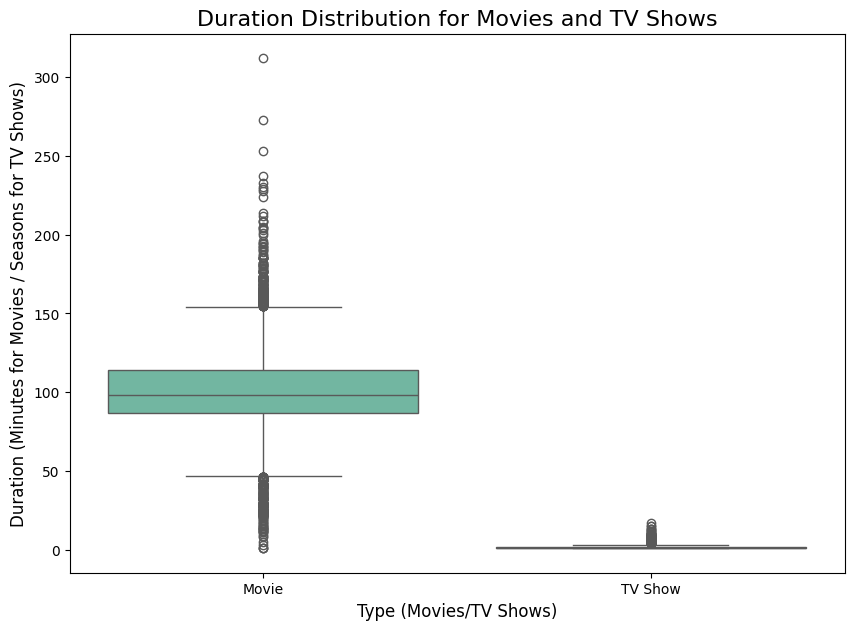

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Preprocess the duration column
# Extract numeric values for Movies (duration in minutes) and TV Shows (number of seasons)
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

# Step 2: Plot the boxplot for Movies and TV Shows
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='type', y='duration_numeric', palette='Set2')

# Add title and labels
plt.title('Duration Distribution for Movies and TV Shows', fontsize=16)
plt.xlabel('Type (Movies/TV Shows)', fontsize=12)
plt.ylabel('Duration (Minutes for Movies / Seasons for TV Shows)', fontsize=12)
plt.show()


Analysing the movie box plot, we can see that most movies fall within a reasonable
duration range, with few outliers exceedingly approximately 2.5 hours. This suggests
that most movies on Netflix are designed to fit within a standard viewing time.


For TV shows, the box plot reveals that most shows have one to four seasons, with
very few outliers having longer durations. This aligns with the earlier trends,
indicating that Netflix focuses on shorter series formats.

#**3. Non-Graphical Analysis: Value counts and unique attributes**

After cleaning the data

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          8807 non-null   object        
 4   cast              8807 non-null   object        
 5   country           8807 non-null   object        
 6   date_added        8807 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8807 non-null   object        
 9   duration          8807 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  month_added       8807 non-null   float64       
 13  month_name_added  8807 non-null   object        
 14  year_added        8807 n

In [40]:
df.describe()

,date_added,release_year,month_added,year_added,duration_numeric
count,8807,8807.000000,8807.000000,8807.000000,8807.000000
mean,2019-05-25 13:17:35.024412160,2014.180198,6.657204,2018.889179,69.823436
min,2008-01-01 00:00:00,1925.000000,1.000000,2008.000000,1.000000
25%,2018-04-30 12:00:00,2013.000000,4.000000,2018.000000,2.000000
50%,2019-07-26 00:00:00,2017.000000,7.000000,2019.000000,88.000000
75%,2020-08-18 00:00:00,2019.000000,10.000000,2020.000000,106.000000
max,2021-09-25 00:00:00,2021.000000,12.000000,2021.000000,312.000000
std,NaN,8.819312,3.412481,1.559256,50.822055


In [41]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,duration_numeric
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,2021.0,90.0
1,s2,TV Show,Blood & Water,Vijay S. Bhanushali,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,September,2021.0,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,September,2021.0,1.0
3,s4,TV Show,Jailbirds New Orleans,Vijay S. Bhanushali,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,September,2021.0,1.0
4,s5,TV Show,Kota Factory,Vijay S. Bhanushali,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,September,2021.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11.0,November,2019.0,158.0
8803,s8804,TV Show,Zombie Dumb,Vijay S. Bhanushali,David Attenborough,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7.0,July,2019.0,2.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11.0,November,2019.0,88.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1.0,January,2020.0,88.0


In [42]:
#count of Genres in listed in column
df['listed_in'].value_counts()

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
...,...
"Kids' TV, TV Action & Adventure, TV Dramas",1
"TV Comedies, TV Dramas, TV Horror",1
"Children & Family Movies, Comedies, LGBTQ Movies",1


In [52]:
#How many Movies & TV Shows are in the dataset?

df['type'].unique()

type_counts = df.groupby('type')['type'].count().reset_index(name = 'count')
type_counts

,type,count
0,Movie,6131
1,TV Show,2676


#**4. Visual Analysis - Univariate, Bivariate after pre-processing of the data**

##**4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis**

#univariate

sns.histplot in Seaborn is used to visualize the distribution of a numerical variable.

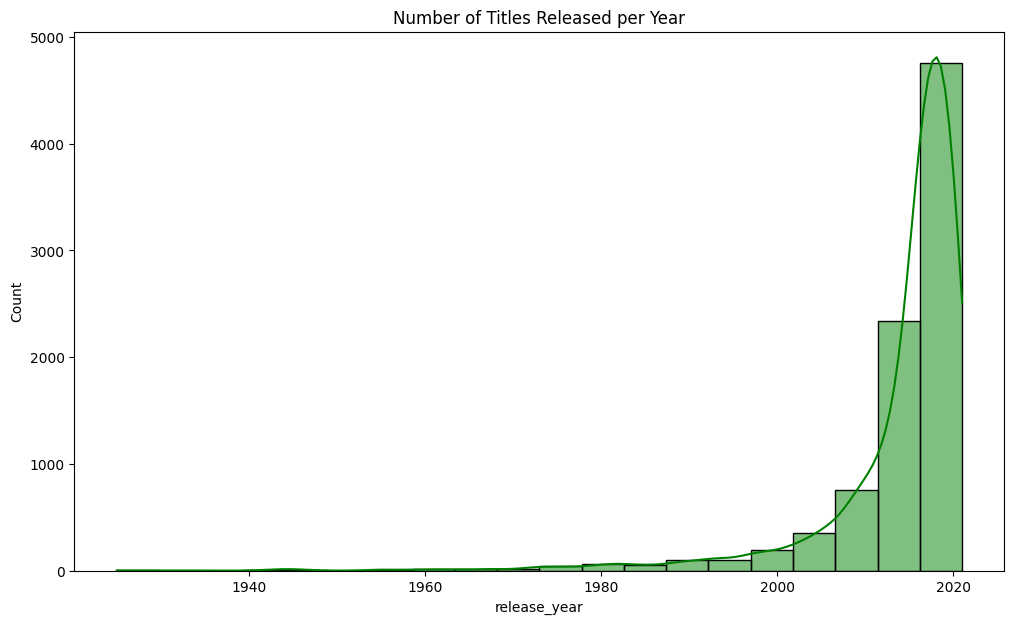

In [43]:
plt.figure(figsize=(12,7))
sns.histplot(data = df, x = 'release_year', kde=True, bins = 20, color = 'green')
plt.title('Number of Titles Released per Year')
plt.show()


###Release Year Trends:

A histogram of release years shows that Netflix's content library has rapidly expanded in recent years. The majority of titles were added between 2010 and 2020, with a significant rise starting around 2015. this indicates Netflix's aggressive push in producing or acquiring new content during the streaming boom.

###Netflix Content By Type:

Anylising entire Netflix dataset consisting of both movies and shows. Lets compare the totals no. of movies and shows in this dataste to knwo which one is the majority.

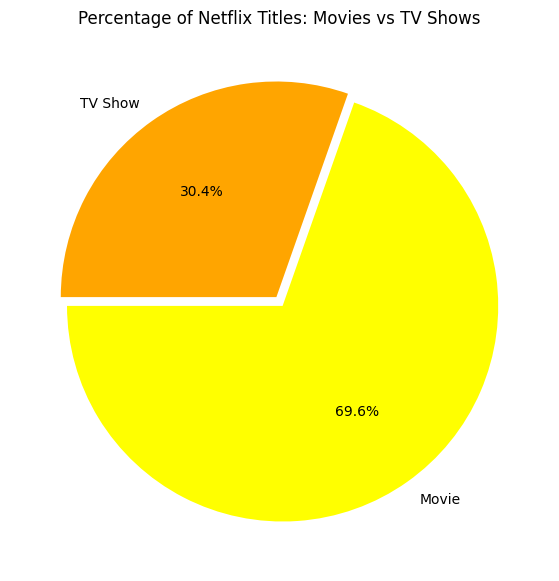

In [44]:
plt.figure(figsize=(12,7))
plt.title("Percentage of Netflix Titles: Movies vs TV Shows")
graph = plt.pie(df.type.value_counts(), explode= (0.025, 0.025),
                labels = df.type.value_counts().index, colors = ['yellow','orange'], autopct = '%1.1f%%',
                startangle = 180)

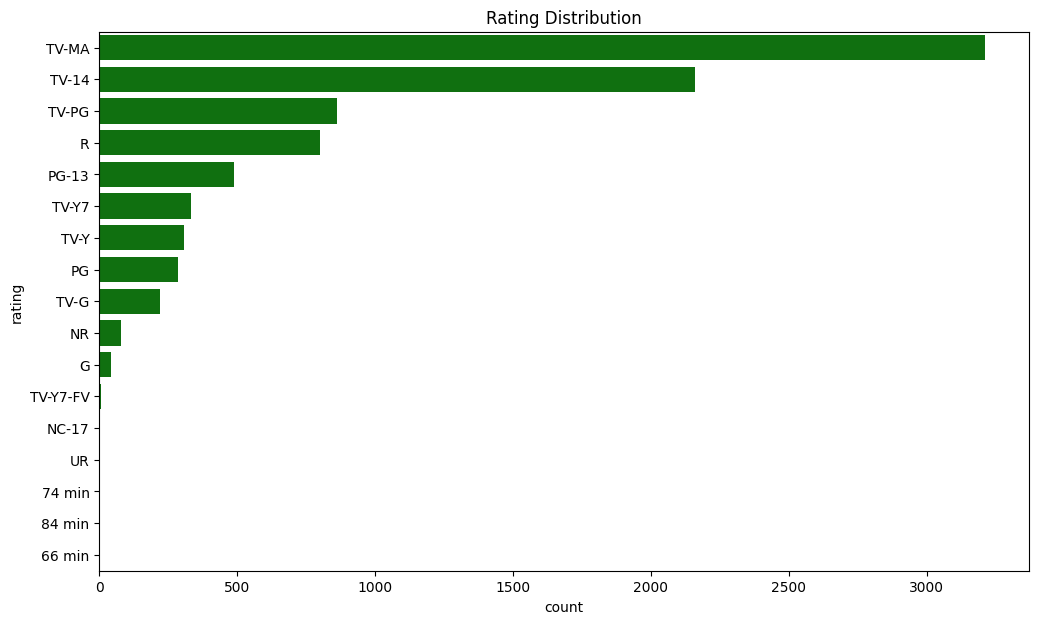

In [45]:
plt.figure(figsize=(12,7))
ax = sns.countplot(y = 'rating', data = df, order = df['rating'].value_counts().index, color = 'green')
plt.title('Rating Distribution')
#add_data_labels(ax, type = 'bar')
plt.show()

###Rating Distribution

The count plot show cases the distribution of ratings, with 'TV-MA' having the highest count at around 3200, followed by 'TV-14' with approximately 220 counts.

This reveals that the majority of the content is rated 'TV-MA', indicating a mature audience target. 'TV-14' and 'TV-PG' also have significant representation. suggesting a diverse range of content suitable for different age groups.

#Bivariate Analysis


Moving on to bivariate analysis, we'll now explore relationship between pairs of variables with our netflix dataset. With focus on understanding how different attributes interact with each other

###Top 15 Countries by Show Type

Text(0.5, 1.0, 'Top 15 Countries by Type of Shows')

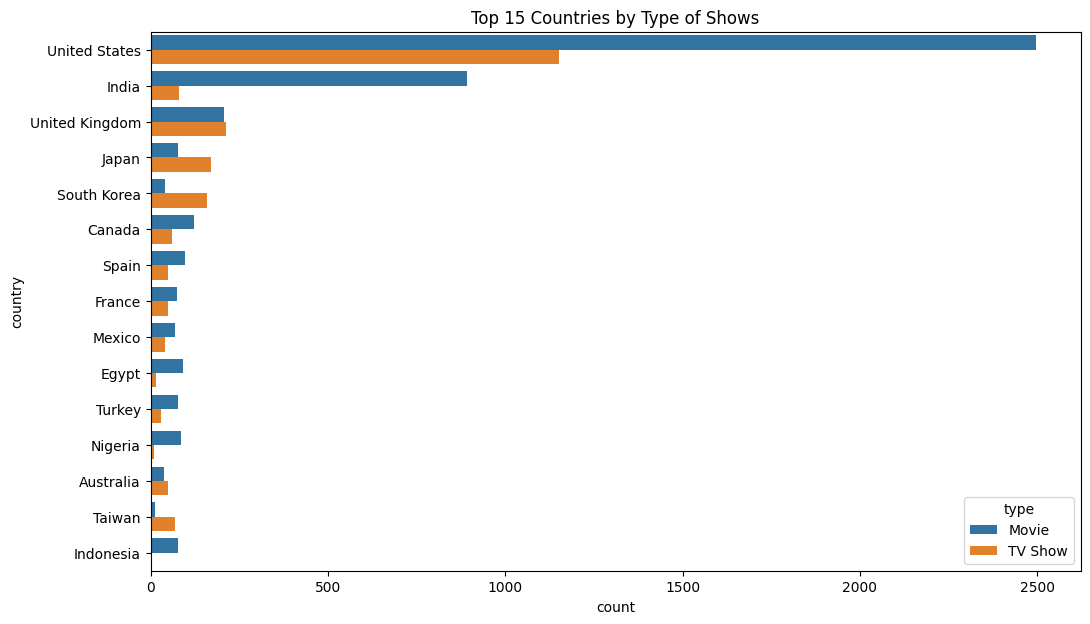

In [46]:
# Generate clustered bar chart
plt.figure(figsize=(12,7))
ax = sns.countplot(y = 'country', hue = 'type', data = df, order =
                   df['country'].value_counts().index[:15])
plt.title('Top 15 Countries by Type of Shows')

The analysis unveils the distribution of content types (movies vs TV shows) across different countries. Notably, the United States stands out with over 2000 movies and approximately 750 TV shows, showcasing a diverse range of content offerings. In contrast, India boasts nearly 900 movies but only around 80 TV shows, indicating a preference for movies over TV content in the region.
Similarly, UK exhibits a nearly equal distribution, with roughly 200 movies and approximately 210 TV shows. These findings underscore the importance of understanding regional preferences and can significantly inform acquisition strategies tailored to specific markets

#**4.3 For correlation: Heatmaps, Pairplots**

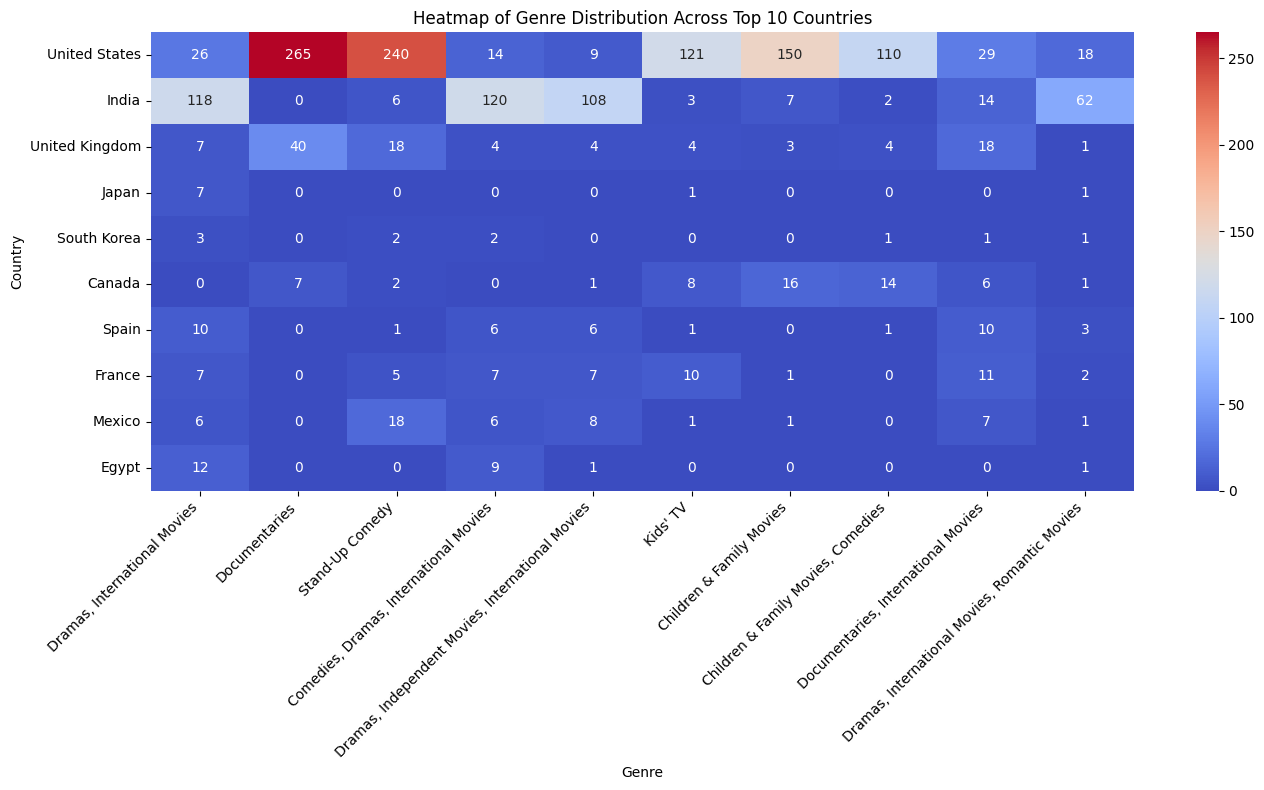

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data: Count occurrences of 'listed_in' (genre) by 'country'
heatmap_data = df.groupby(['country', 'listed_in']).size().unstack(fill_value=0)

# Filter top 10 countries and top 10 genres for better readability
top_countries = df['country'].value_counts().index[:10]
top_genres = df['listed_in'].value_counts().index[:10]
heatmap_data = heatmap_data.loc[top_countries, top_genres]

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Genre Distribution Across Top 10 Countries")
plt.xlabel("Genre")
plt.ylabel("Country")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


As per visualization we can see that United States is preferring specific Genres like Documentries, Standup Comedy followed by Children &Family Movies.

Where as in we can see that Indias interest lies in Dramas International Movies and Comedies.

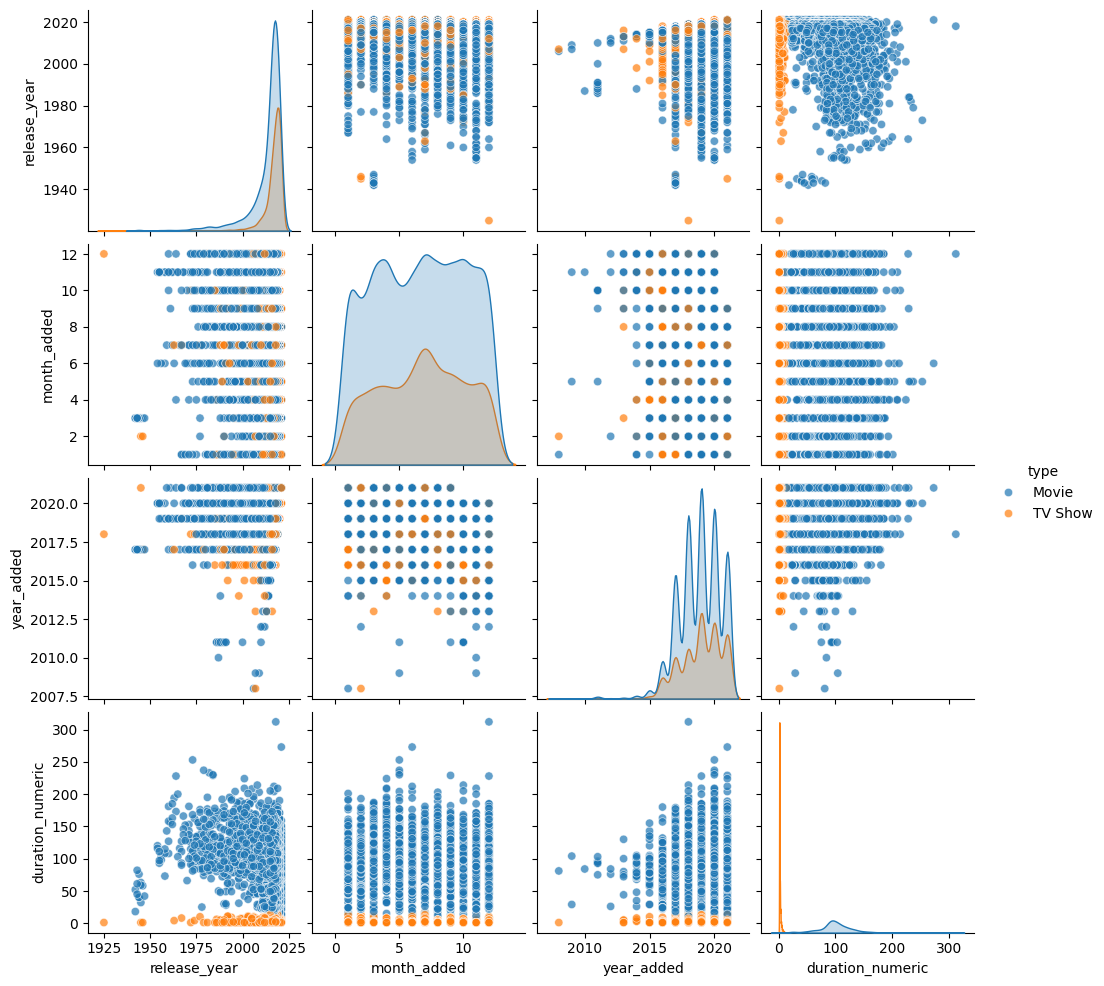

In [48]:
sns.pairplot(df, hue='type', diag_kind='kde', plot_kws={"alpha": 0.7})


A pairplot plot a pairwise relationships in a dataset.
The pairplot function creates a grid of Axes such that each variable in data will by shared in
the y-axis across a single row and in the x-axis across a single column.  It is giving us quick insight which column is trending with which data

#**7. Business Insights**

With the help of this article, we have been able to learn about

1. Quantity: Our analysis revealed that Netflix had added more movies than TV shows,
aligning with the expectation that movies dominate their content library.

2. Release Year Trends:

A histogram of release years shows that Netflix's content library has rapidly expanded in recent years. The majority of titles were added between 2010 and 2020.

3. Genre Correlation: Strong positive associations were observed between various
genres, such as TV dramas and international TV shows, romantic and international
TV shows, and independent movies and dramas. These correlations provide insights
into viewer preferences and content interconnections in different contries like US and India


4. Movie Lengths: The analysis of movie durations indicated a peak around the 1960s,
followed by a stabilization around 100 minutes, highlighting a trend in movie lengths
over time.


5. TV Show Episodes: Most TV shows on Netflix have one season, suggesting a
preference for shorter series among viewers.

6. Rating Distribution: The distribution of ratings over the years offers insights into the
evolving content landscape and audience reception.

7. Top 10 countries by type of shows: These findings helped us to underscore the importance of understanding regional preferences and can significantly inform acquisition strategies tailored to specific markets. As, Us stands out followed by India.

8. Data-Driven Insights: Our data analysis journey showcased the power of data in
unravelling the mysteries of Netflix’s content landscape, providing valuable insights
for viewers and content creators.

9. Continued Relevance: As the streaming industry evolves, understanding these
patterns and trends becomes increasingly essential for navigating the dynamic
landscape of Netflix and its vast library.


### **Recommendations:**

1. **Increase Investment in Movies:**
   - Since movies dominate Netflix's content library, focusing on producing or acquiring high-quality, diverse movies can attract a broader audience.
   - Prioritize genres that show high viewer engagement, such as action, drama, or comedy.

2. **Enhance TV Show Variety:**
   - While movies dominate, TV shows still have strong audience retention. Investing in popular formats like limited series, reality shows, or docuseries can balance the library and attract binge-watchers.

3. **Leverage Recent Content Trends:**
   - The majority of titles in the library were added after 2010, indicating a shift toward modern, relevant content. Continue focusing on recent releases and trending topics to stay ahead in the competitive streaming market.

4. **Personalized Content Strategy:**
   - Use advanced analytics to identify gaps in the content library and create region-specific content based on viewer preferences. For instance, analyze which genres are most popular in different countries.

5. **Collaborate with Emerging Directors and Creators:**
   - Since trends suggest growing content creation in recent years, partner with emerging filmmakers to produce fresh, innovative ideas that appeal to younger audiences.

6. **Utilize Data for Predictive Insights:**
   - Monitor trends in viewer engagement to predict future successful genres or formats. Use this information to guide acquisitions and original productions.

7. **Target Niche Genres:**
   - Identify less-represented but high-performing genres and invest in them to cater to specific audience segments. For example, science fiction or fantasy shows often attract dedicated fanbases.

8. **Maintain Focus on Original Content:**
   - Expand the library of Netflix Originals to differentiate the platform from competitors. Original movies and series have proven to drive subscriptions and brand loyalty.

9. **Diversify Regional Content:**
   - Since the streaming industry is global, growing regional content production will help expand market share in areas like Asia, Latin America, and Africa.

By implementing these strategies, Netflix can continue growing its subscriber base and strengthening its position in the competitive streaming market.